# DAT 301 Project 2 - An Analysis of Food Waste Around the World

### Group Members: Bharath Prabakaran, Aditya Boghara



## About the project:

The primary goal for this project is to explore the factors affecting food wastage around the world and trying to find what food are being wasted. Food waste in a significant cause of pollution, due to the release of methane(a greenhouse gas). By an analysis of food waste around the world we hope to see how some countries have low food wastages and how they are managed. The huge amount of food wasted could be put to better use in some of the countries in the world were famines are a problem.


## Importing the libraries

In [1]:
#Load the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import mapclassify
import plotly.express as px
import plotly.graph_objects as go
# import sys
# !{sys.executable} -m pip install seaborn
from ipywidgets import widgets,interactive
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

## Importing Datasets

Sources:
- What A Waste Global Database. https://datacatalog.worldbank.org/search/dataset/0039597.

This dataset contains vital information about each country. The GDP, population and organic waste percent values were obtained from these datasets.

- “Food Loss and Waste Database.” Food and Agriculture Organization of the United Nations, https://www.fao.org/platform-food-loss-waste/flw-data/en/. 

This dataset contains the different catagories of wasted food, these values are used later on in the project.

"*To help  monitor the state of food loss, FAO conducted an extensive review of literature in the public domain which gathered data and information from almost 500 publications, reports, and studies from various sources (including from organizations like the World Bank, GIZ, FAO, IFPRI, and more)*.

*The data from this review is held within the interactive Food Loss and Waste Database which allows for micro and macro analysis of different sets of data.*" - from fao.org 


In [2]:
country_level_dataset = pd.read_csv('./Country_level_dataset.csv')
city_level_dataset = pd.read_csv('./city_level_data_0_0.csv')


#filtering the required data
country = country_level_dataset[['country_name', 'gdp','composition_food_organic_waste_percent',
                                 'population_population_number_of_people']]

city = city_level_dataset[['country_name', 'city_name','composition_food_organic_waste_percent']]



# changine column names
country = country.rename(columns = {"country_name":"country","gdp":"GDP","composition_food_organic_waste_percent":"organic_food_waste_percent","population_population_number_of_people":"population"})
city = city.rename(columns = {"country_name":"country","city_name":"city","composition_food_organic_waste_percent":"organic_food_waste_percent" })    

# show dataset
country = country.dropna()
city = city.dropna()
# country_level_dataset.head()

## Examining our data

The following three Plots show the spread of GDP, Population, and Organic Food Waste Percentage around the World via the use of box plots. The box plot shows the information regarding like mean, median and many more.

Adjacent to the box plots the actual values of the countries are spread out on the graph, these can be used to cross reference a particular country to the box plot. Hovering over a scatter point gives you the exact value.

### Box plot of GDP 

Gross domestic product (GDP) is the total monetary or market value of all the finished goods and services produced within a country’s borders in a specific time period. We are using mean in our project as a measure of a country's wealth.

In [3]:
fig = px.box(country, y =['GDP'] , points="all")
fig.update_layout(title='Plot GDP of Countries around the World', xaxis_title = "GDP")
fig.show()

### Box plot for Population

In [4]:
fig = px.box(country, y =['population'] , points="all",log_y=True)
fig.update_layout(title='Plot of the log of Population', xaxis_title = "Population", yaxis_title = "In billions")
fig.show()

### Box plot for organic food waste percent

In the given dataset organic waste is not just food waste but includes, food wrappers, yard scrapping, agricultural waste(manure), wood waste and much more. This need to be kept in mind, and is the reason some countries organic waste percentages are high as they are.



![shot 2](./ScreenShot2.png)

In [5]:
fig = px.box(country, y =['organic_food_waste_percent'] , points="all")
fig.update_layout(title='Plot Organic food waste percent of Countries', xaxis_title = "Organic food waste percent", yaxis_title = "Percent")
fig.show()

### Trend between GDP and organic food waste percent

Ths scatter plot graph between the GDP and the Organic food waste percent. It is showing the standing of different countries with respect to one another. You can see that the countries are evenly distributes over the plot.

The below is the regression line between GDP and Organic food waste percent. This graph shows the trend between GDP and Organic food waste percent. You can clearly see the relationship between both of them. Both of them has a linear relationship. A variety of countries have GDPs between 0 to 20k while they have a diverse variety of population.

In [6]:
# GDP VS Waste

# fig2 = go.Figure(data=go.Scatter(x=country['GDP'],
#                                 y=country['organic_food_waste_percent'],
#                                 mode='markers',
#                                 marker_color=country['population'],
#                                 text=country['country'])) 

# fig2.update_layout(title='GDP vs the Organic food waste percent of different countries',
#                    xaxis_title="GDP", yaxis_title = "Organic Food waste Percent")

# # fig1.show()
# fig2.show()

# showing the corelation between gdp and food waste percent by regression line

fig1 = px.scatter(country,x=country.organic_food_waste_percent,y=country.GDP, trendline = "ols")
fig1.update_layout(title='Relation between the GDP and Organic Food waste percent',
                   xaxis_title="Organic Food Waste Percent", yaxis_title = "GDP")
fig1.show()

### Trend between population and organic food waste percent

The below graph shows the trend between the population and Organic food waste percent. You can see a logistic regression trend between the organic food waste percent and population. 

In [7]:
# population vs food waste 

# fig2 = go.Figure(data=go.Scatter(x=country['organic_food_waste_percent'],
#                                 y=country['population'],
#                                 mode='markers',
#                                 marker_color=country['population'],
#                                 text=country['country'])) 

# fig2.update_layout(title='Population vs food waste percent of different countries',
#                    xaxis_title="Organic Food Waste Percent", yaxis_title = "Population")
# fig2.update_yaxes(type="log")

# # fig1.show()
# fig2.show()

# showing the corelation between population and food waste percent by regression line

fig1 = px.scatter(country,x=country.organic_food_waste_percent,y=country.population, trendline = "ols", log_y = True)
fig1.update_layout(title='Relation between Population and Organic food waste percent',
                   xaxis_title="Organic Food Waste Percent", yaxis_title = "Population")
fig1.show()

### List of top ten countries with leading organing waste percent and countries with the minimilist organic food waste percent

The below are the list of top countries in the list with the highest and the lowest organic food waste percent. The countries marked in Red are going to be used for a case study. The study chooses a country from the top 20 and another from the bottom 20.

In [8]:
cm = sns.light_palette("red", as_cmap=True)

def markcount(s):
    if s.country == "Turkey" or s.country == "Denmark":
        return ['background-color: red']*4
    else:
        return ['background-color: white']*4
least_twenty_countries = country.sort_values(by=['organic_food_waste_percent'],ascending=True).head(20).style.apply(markcount, axis=1).background_gradient(cmap='viridis')
top_twenty_countries = country.sort_values(by=['organic_food_waste_percent'],ascending=False).head(20).style.apply(markcount, axis=1).background_gradient(cmap='viridis')
least_twenty = country.sort_values(by=['organic_food_waste_percent'],ascending=True).head(20)
top_twenty = country.sort_values(by=['organic_food_waste_percent'],ascending=False).head(20)

In [9]:
print("List of countries with the lowest organic food waste percent")
least_twenty_countries

List of countries with the lowest organic food waste percent


In [10]:
print("List of countries with the highest organic food waste percent")
top_twenty_countries

List of countries with the highest organic food waste percent


### Line Graph for the Top twenty countries in organic food waste percent.

The following graph shows the line graph of the top ten and the bottom ten countries with the highest and the lowest organic food waste percent. 

In [11]:
# line graph of GDP vs waste percent of top ten countries with highest and lowest organic food waste percent

fig = go.Figure()
# Add traces
fig.add_trace(go.Scatter(x=top_twenty['organic_food_waste_percent'], y=top_twenty['GDP'],
                    mode='lines+markers',
                    name='Least Ten Countires'))
fig.update_layout(title='GDP vs Food waste percent(Top Twenty)',
                   xaxis_title="Organic Food Waste Percent", yaxis_title = "GPD")
fig.show()


### Line Graph for the bottom Twenty countries in organic food waste percent.

In [12]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=least_twenty['organic_food_waste_percent'], y=least_twenty['GDP'],fillcolor="red",
                    mode='lines+markers',
                    name='Top Ten Countries',
                    ))
fig1.update_layout(title='GDP vs Food waste percent(Bottom Twenty)',
                   xaxis_title="Organic Food Waste Percent", yaxis_title = "GPD")

In [13]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#Exclude Antarctica
world = world.loc[world.continent != 'Antarctica']

# fig, ax1 = plt.subplots(1,1, figsize=(15, 10), dpi=90)

# world.plot(ax=ax1, scheme="quantiles", k = 10, column = 'pop_est', linewidth = 1, edgecolor = 'black',
#            legend = True, legend_kwds={'loc': 'lower left'}) 

# world

In [14]:
gdf_water = world.merge(country_level_dataset, left_on = 'iso_a3', right_on = 'iso3c', how='left')

### Representing Geoplot for Organic food waste percent

The below geoplot represents the organic food waste percent over the world. You can see that many african countries have very high organic waste percentages.

<AxesSubplot:>

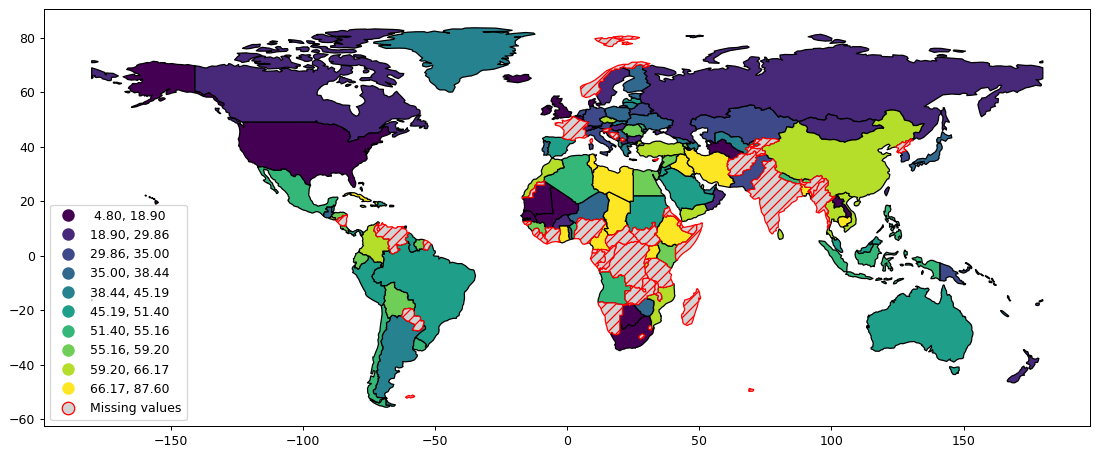

In [15]:
fig, ax1 = plt.subplots(1,1, figsize=(15, 10), dpi=90)

gdf_water.plot(ax=ax1, scheme="quantiles", k = 10, column = 'composition_food_organic_waste_percent', linewidth = 1, edgecolor = 'black',
               missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Missing values"},
           legend = True, legend_kwds={'loc': 'lower left'}) 

### Geoplot of the GDP of different countries

The below geoplot shows the GDP distribution of different countries. When comparing it to the previous geo plot we can see a pattern. The countries with higher GDP have lower organic waste percentages.

<AxesSubplot:>

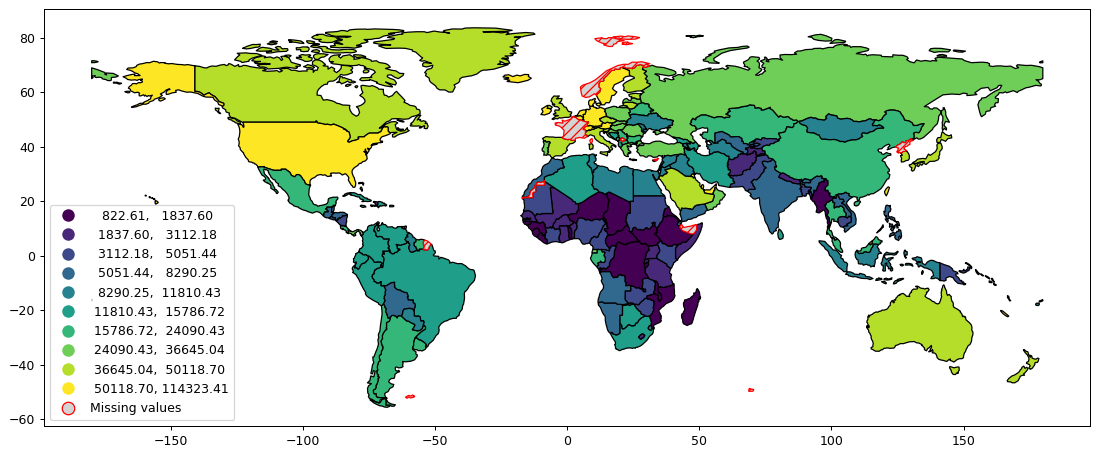

In [16]:
fig, ax1 = plt.subplots(1,1, figsize=(15, 10), dpi=90)

gdf_water.plot(ax=ax1, scheme="quantiles", k = 10, column = 'gdp', linewidth = 1, edgecolor = 'black',
           legend = True, legend_kwds={'loc': 'lower left'},missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Missing values"}) 

### GeoPlot for the for Special waste agricultural waste (tons/year)

The below graph show the special waste agricultural waste produced by few of the countries. Much of the data is still mssing so the grey part with the dashed lines shows the missing data.

<AxesSubplot:>

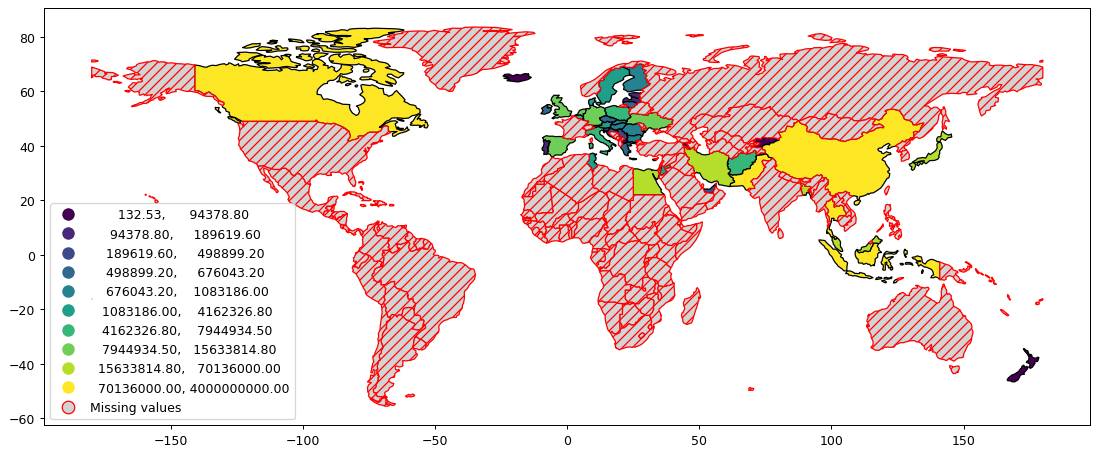

In [17]:
fig, ax1 = plt.subplots(1,1, figsize=(15, 10), dpi=90)

gdf_water.plot(ax=ax1, scheme="quantiles", k = 10, column = 'special_waste_agricultural_waste_tons_year', linewidth = 1, edgecolor = 'black',
           legend = True, legend_kwds={'loc': 'lower left'},missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Missing values"}) 

### Reading the datasets and Filtering Data

In [18]:
countrydata = pd.read_csv("./Country_level_dataset.csv")
waste = pd.read_csv("./FOOD_WASTE-2017-1-EN-20180201T100909.csv")
new_waste =  waste[["LOCATION","Country","Category","ACT","Unit","Variable","Time","Value"]]
country_names = np.unique(waste['Country'])
new_waste.loc[:, ('Variable')] = new_waste.loc[:, ('Variable')].str.replace("Food Waste - ","")
new_waste.loc[:, ('Variable')] = new_waste.loc[:, ('Variable')].str.replace("Vegetale","Vegetable")
new_waste.loc[:, ('Variable')] = new_waste.loc[:, ('Variable')].str.replace("vegetal","Vegetable")

## Interactive Plot of wastage of each Country by Food groups

The following plot can be interected with via the dropdown menu showing the list of available countries. The primary purpose of this graph is to do an introductory exploration of each countries food wastage. The data in these graphs are all from the year 2009 and were obtained in a international survey that took place in 2009. Some countries in the list use different sort of categories instead of the traditional ones. 


In [19]:
country_select = widgets.Dropdown(
    options=country_names,
    value='Turkey',
    description='Country:',
)
def plotit(country_select):
    tonne_waste = new_waste[new_waste.Unit == "tonnes"]
    year_waste = tonne_waste[tonne_waste.Time == 2009]
    df = year_waste[year_waste.Country == country_select]
    if df.empty:
        print("Sorry, There is not data for this country.")
    else:
        sns.barplot(x = 'Value',
            y = 'Variable',
            data = df).set(title='Plot of wastage of Each country by Food groups',xlabel = "Food Waste(Tonnes)", ylabel = "Food Groups")
    plt.show()
interactive(plotit, country_select=country_select)

interactive(children=(Dropdown(description='Country:', index=29, options=('Australia', 'Austria', 'Belgium', '…

## Pie Chart on food Groups

By the use of a Pie chart, we will try to find which food group is wasted the most. For the analysis we will continue using the 2009 data from the previous plot. The waste of each food group will be summed up country to country. From the Pie chart we can observe that the Vegetables Food group have the highest food wastage, followed by fruits. This is due to the massive amount of these products wasted during and after agriculture. 

"“Imperfect” produce is often turned away by grocery stores for not meeting strict cosmetic standards – making up around 40% of total food waste." - Kateman, Brian. “The Time Is Ripe for Ugly Fruits and Vegetables.” 

Source:
Kateman, Brian. “The Time Is Ripe for Ugly Fruits and Vegetables.” Forbes, Forbes Magazine, 2 Mar. 2020, https://www.forbes.com/sites/briankateman/2020/03/02/the-time-is-ripe-for-ugly-fruits-and-vegetables/?sh=3371c3b64a85. 

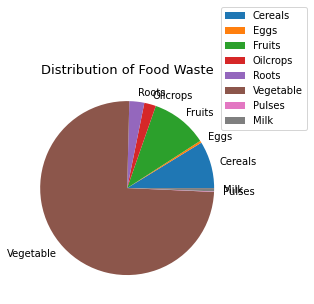

In [20]:
df = new_waste
Cereals = df.Value[df.Variable.str.contains('Cereal')].sum()
Eggs = df.Value[df.Variable.str.contains('Egg')].sum()
Fruits = df.Value[df.Variable.str.contains('Fruit')].sum()
Oilcrops = df.Value[df.Variable.str.contains('Oilcrop')].sum()
Roots = df.Value[df.Variable.str.contains('Root')].sum()
Vegetable = df.Value[df.Variable.str.contains('Vegetable')].sum()
Pulses = df.Value[df.Variable.str.contains('Pulse')].sum()
Milk = df.Value[df.Variable.str.contains('Milk')].sum()
data = [Cereals, Eggs, Fruits, Oilcrops, Roots, Vegetable, Pulses, Milk]
labels = ["Cereals", "Eggs", "Fruits", "Oilcrops", "Roots", "Vegetable", "Pulses", "Milk"]
patches, texts = plt.pie(data, labels = labels)
plt.title("Distribution of Food Waste", fontsize=13);
plt.legend(patches, labels,bbox_to_anchor=(1.35, 1.05), loc='right')

plt.show()

## Vegetable and Fruit Waste by Year

The following graph tries to explore how much the waste of fruits and vegetables has changed over the years. This graph examines the years 2004 to 2010 with a survey taken on the even years. According to the graph there a downward trend in the amount vegetables we are wasting. Furthermore, the US goverment has plans to reduce food waste by half by the hear 2030.

Source:
“United States 2030 Food Loss and Waste Reduction Goal.” EPA, Environmental Protection Agency, https://www.epa.gov/sustainable-management-food/united-states-2030-food-loss-and-waste-reduction-goal. 

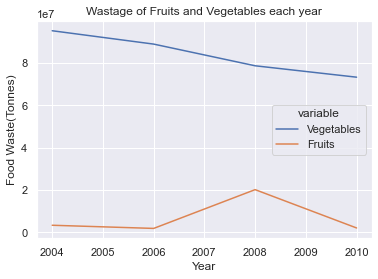

In [21]:
tonne_waste = new_waste[new_waste.Unit == "tonnes"]

df = tonne_waste[tonne_waste.Time == 2003]
Vegetable3 = df.Value[df.Variable.str.contains('Vegetable')].sum()
df = tonne_waste[tonne_waste.Time == 2004]
Vegetable4 = df.Value[df.Variable.str.contains('Vegetable')].sum()
df = tonne_waste[tonne_waste.Time == 2005]
Vegetable5 = df.Value[df.Variable.str.contains('Vegetable')].sum()
df = tonne_waste[tonne_waste.Time == 2006]
Vegetable6 = df.Value[df.Variable.str.contains('Vegetable')].sum()
df = tonne_waste[tonne_waste.Time == 2007]
Vegetable7 = df.Value[df.Variable.str.contains('Vegetable')].sum()
df = tonne_waste[tonne_waste.Time == 2008]
Vegetable8 = df.Value[df.Variable.str.contains('Vegetable')].sum()
df = tonne_waste[tonne_waste.Time == 2009]
Vegetable9 = df.Value[df.Variable.str.contains('Vegetable')].sum()
df = tonne_waste[tonne_waste.Time == 2010]
Vegetable10 = df.Value[df.Variable.str.contains('Vegetable')].sum()
df = tonne_waste[tonne_waste.Time == 2011]
Vegetable11 = df.Value[df.Variable.str.contains('Vegetable')].sum()
df = tonne_waste[tonne_waste.Time == 2012]
Vegetable12 = df.Value[df.Variable.str.contains('Vegetable')].sum()


df = tonne_waste[tonne_waste.Time == 2003]
Fruit3 = df.Value[df.Variable.str.contains('Fruit')].sum()
df = tonne_waste[tonne_waste.Time == 2004]
Fruit4 = df.Value[df.Variable.str.contains('Fruit')].sum()
df = tonne_waste[tonne_waste.Time == 2005]
Fruit5 = df.Value[df.Variable.str.contains('Fruit')].sum()
df = tonne_waste[tonne_waste.Time == 2006]
Fruit6 = df.Value[df.Variable.str.contains('Fruit')].sum()
df = tonne_waste[tonne_waste.Time == 2007]
Fruit7 = df.Value[df.Variable.str.contains('Fruit')].sum()
df = tonne_waste[tonne_waste.Time == 2008]
Fruit8 = df.Value[df.Variable.str.contains('Fruit')].sum()
df = tonne_waste[tonne_waste.Time == 2009]
Fruit9 = df.Value[df.Variable.str.contains('Fruit')].sum()
df = tonne_waste[tonne_waste.Time == 2010]
Fruit10 = df.Value[df.Variable.str.contains('Fruit')].sum()
df = tonne_waste[tonne_waste.Time == 2011]
Fruit11 = df.Value[df.Variable.str.contains('Fruit')].sum()
df = tonne_waste[tonne_waste.Time == 2012]
Fruit12 = df.Value[df.Variable.str.contains('Fruit')].sum()


x = [ 2004, 2006, 2008 ,2010]
y1 = [Vegetable4,Vegetable6,Vegetable8,Vegetable10]
y2 = [Fruit4,Fruit6,Fruit9,Fruit10]

data_preproc = pd.DataFrame({
    'Year': x, 
    'Vegetables': y1,
    'Fruits': y2 })


sns.set_theme(style="darkgrid")
sns.lineplot(x='Year', y='value', hue='variable', 
             data=pd.melt(data_preproc, ['Year'])).set(title='Wastage of Fruits and Vegetables each year',xlabel = "Year", ylabel = "Food Waste(Tonnes)")

plt.show()




# Case Study 1:

## Denmark


- Population: 5.8 million

- GDP: 60,566 $ per capita

- Agricultural Land: 207000 hectares

Denmark was chosen for this case study because it is one of te countries with the least food waste. The primary factors contributing towards this are the wealth of the country and the relatively small population of the country.

Denmark also gives a lot of importance towards reducing the amount of waste that they landfill, instead they prefer the use their waste to produce energy. The fact that they have very little agricultural land also helps them reduce their food waste. Their most wasted food group is cereals, according to the above barplot. This subverts the usual trend of vegetables being the most wasted food group. The little agricultural land goes towards animals farming instead of crop farming.

### Sources:

- “Population, Total - Denmark, Turkey.” Data,  https://data.worldbank.org/indicator/SP.POP.TOTL?locations=DK-TR. 

- “GDP (Current US$) - Denmark, Turkey.” Data, https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?locations=DK-TR. 

- “Agricultural Land (Sq. Km) - Denmark, Turkey.” Data, https://data.worldbank.org/indicator/AG.LND.AGRI.K2?locations=DK-TR. 

- “Waste Management in Denmark.” Waste, Materials Management and the Circular Economy | OECD Environmental Performance Reviews: Denmark 2019 | OECD ILibrary, https://www.oecd-ilibrary.org/sites/d1eaaba4-en/index.html?itemId=%2Fcontent%2Fcomponent%2Fd1eaaba4-en. 


In [22]:
tonne_waste = new_waste[new_waste.Unit == "tonnes"]
year_waste = tonne_waste
df = year_waste[year_waste.Country == "Denmark"]

sns.lineplot(x='Time', y='Value', color="green",
             data=df).set(title='Wastage of Food each year',xlabel = "Year", ylabel = "Food Waste(Tonnes)")
plt.show()


# Case Study 2:

## Turkey

- Population: 84.34 million
- GDP: 28,435 $ per capita
- Agricultural Land: 14,617,000 hectares


The reason for the focus on Turkey was because it is one of the countries with the most food wastage. Although the country's GDP is much higher compared to the other countries at its level, the increased population and bad waste management system causes the very high amount of food wastage. 

On glancing at the food category bar gragh from above we can see that Vegetables are the highest wasted food group, this holds with our previous discovery that the demand for perfect vegetables increases the vegetable waste, and that vegetables usually consist of 30 - 40\% of the total waste.

In Turkey food waste is mostly handled via landfilling and composting, the improper management of food waste can effect the environment negatively. Hence, it is important for Turkey as country to work towards reducing and reusing its fod waste.

### Sources:

- “Population, Total - Denmark, Turkey.” Data,  https://data.worldbank.org/indicator/SP.POP.TOTL?locations=DK-TR. 

- “GDP (Current US$) - Denmark, Turkey.” Data, https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?locations=DK-TR. 

- “Agricultural Land (Sq. Km) - Denmark, Turkey.” Data, https://data.worldbank.org/indicator/AG.LND.AGRI.K2?locations=DK-TR. 

In [23]:
tonne_waste = new_waste[new_waste.Unit == "tonnes"]
year_waste = tonne_waste
df = year_waste[year_waste.Country == "Turkey"]
sns.lineplot(x='Time', y='Value',color="red", 
             data=df).set(title='Wastage of Food each year',xlabel = "Year", ylabel = "Food Waste(Tonnes)")
plt.show()

# Conclusion

From our study of Food wastage around the world, we have learnt that food waste is a big part of the total waste in the world. Among food waste, Vegetables are wasted the most. The improper handling of food waste casues environmental pollution. GDP affects the food waste in both ways, richer countries are more likely to have people who eat out which causes more waste in food and packaging, while poorer countries sometimes can not afford proper waste management. Population, however has a pretty simple relationship with food waste, the more mouths to feed cause more food waste. Although as an individual we can try to reduce our waste, a lot of the food waste are caused at an industry and market level. Better rules for reducing waste at these levels could greatly help our environment, and maybe the food can go to a hungry person instead of going to waste.

The following image is about how food waste in handled in the United States.



![shot 1](./ScreenShot1.png)


The following image show the prefered way of food waste management.

![shot 3](./ScreenShot3.png)



## Works Cited

- “Agricultural Land (Sq. Km) - Denmark, Turkey.” Data, https://data.worldbank.org/indicator/AG.LND.AGRI.K2?locations=DK-TR. 

- “Food Loss and Waste Database.” Food and Agriculture Organization of the United Nations, https://www.fao.org/platform-food-loss-waste/flw-data/en/.

- “GDP (Current US$) - Denmark, Turkey.” Data, https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?locations=DK-TR. 

- Kateman, Brian. “The Time Is Ripe for Ugly Fruits and Vegetables.” Forbes, Forbes Magazine, 2 Mar. 2020, https://www.forbes.com/sites/briankateman/2020/03/02/the-time-is-ripe-for-ugly-fruits-and-vegetables/?sh=3371c3b64a85. 

- “Population, Total - Denmark, Turkey.” Data, https://data.worldbank.org/indicator/SP.POP.TOTL?locations=DK-TR. 

- “United States 2030 Food Loss and Waste Reduction Goal.” EPA, Environmental Protection Agency, https://www.epa.gov/sustainable-management-food/united-states-2030-food-loss-and-waste-reduction-goal. 

- “Waste Management in Denmark.” Waste, Materials Management and the Circular Economy | OECD Environmental Performance Reviews: Denmark 2019 | OECD ILibrary, https://www.oecd-ilibrary.org/sites/d1eaaba4-en/index.html?itemId=%2Fcontent%2Fcomponent%2Fd1eaaba4-en.

- What A Waste Global Database. https://datacatalog.worldbank.org/search/dataset/0039597. 
